In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

import algorithms

for dirname, _, filenames in os.walk('../data/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

../data/kaggle/input/.DS_Store
../data/kaggle/input/titanic/my_submission.csv
../data/kaggle/input/titanic/test.csv
../data/kaggle/input/titanic/train.csv


In [2]:
def squash_dummies(df: pd.DataFrame, feature, threshold):
    masked_df = df[feature].mask(df[feature] > threshold)
    df = df.drop(columns=[feature])
    df[feature] = masked_df
    return df

def prepare_df(df: pd.DataFrame):
    new_df = pd.DataFrame(data = df)
    extract_title_from_name(new_df)
    new_df['Has_cabin'] = new_df['Cabin'].isna().astype(int)
    new_df['Family'] = 0 + new_df['SibSp'] + new_df['Parch']
    # encode_col_list = list(new_df.select_dtypes(include=['object']).columns)
    _dummy_features0 = ["Embarked"]
    _dummy_features = ["Pclass", "Sex", "SibSp", "Parch", "Title"]
    new_df = squash_dummies(new_df, 'Parch', 2)
    new_df = squash_dummies(new_df, 'SibSp', 4)
    new_df = new_df.drop(columns=['Name', 'Cabin'])
    new_df = pd.get_dummies(new_df, columns=_dummy_features0, dummy_na=True)
    new_df = pd.get_dummies(new_df, columns=_dummy_features, dummy_na=False)
    # scale_num_features(new_df)
    return new_df

def scale_num_features(df):
    # train_numerical_features = list(df.select_dtypes(include=['int64', 'float64', 'int32']).columns)
    train_numerical_features = ['Age', 'Family']
    print(f"TNF: {train_numerical_features=}")
    from sklearn.preprocessing import StandardScaler
    ss_scaler = StandardScaler()
    df[train_numerical_features] = ss_scaler.fit_transform(df[train_numerical_features])
    print(f"{df.columns=}")

def extract_title_from_name(df: pd.DataFrame):
    df['Title'] = list(zip(df.Sex, df.Name, df.SibSp))
    df['Title'] = df['Title'].transform(lambda n: extract_title(n))
    print(df['Title'].unique())

def extract_title(name):
    male = name[0] == 'male'
    if male and str(name[1]).find('Mr') > -1:
        return 'Mr'
    if not male and str(name[1]).find('Mrs') > -1:
        return 'Mrs'
    if not male and str(name[1]).find('Miss') > -1:
        return 'Miss'
    if not male and str(name[1]).find('Mme') > -1:
        return 'Ms'
    if male and str(name[1]).find('Master') > -1:
        return 'Master'
    if str(name[1]).find('Dr.') > -1:
        return 'Dr'
    if male:
        return 'Mr'
    if name[2]>1:
        return'Mrs'
    # print(name)
    return 'Ms'

In [4]:
train_data = pd.read_csv('../data/kaggle/input/titanic/train.csv')
train_data.head()

# print(train_data.describe())
# train_data['has_cabin'] = train_data['Cabin'].isna().astype(int)
# train_data.head()
# train_data.groupby('Embarked').hist()
# train_data.groupby('Cabin').sum().head(50)
# masked_df1 = train_data['Cabin'].mask(train_data['Cabin'] is not None)
# print(train_data.head())
# df = df.drop(columns=[feature])
# np.isnan(train_data['Cabin'][0])
import seaborn as sns
eda_data = train_data.copy()

# extract_title_from_name(eda_data)
# sns.pairplot(prepare_df(eda_data[['Survived', 'Age', 'Fare', 'Has_cabin', 'Family',
#                                   'SibSp','Parch', 'Pclass', 'Title_Dr', 'Title_Master',
#        'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Ms']]))
# plt.show()

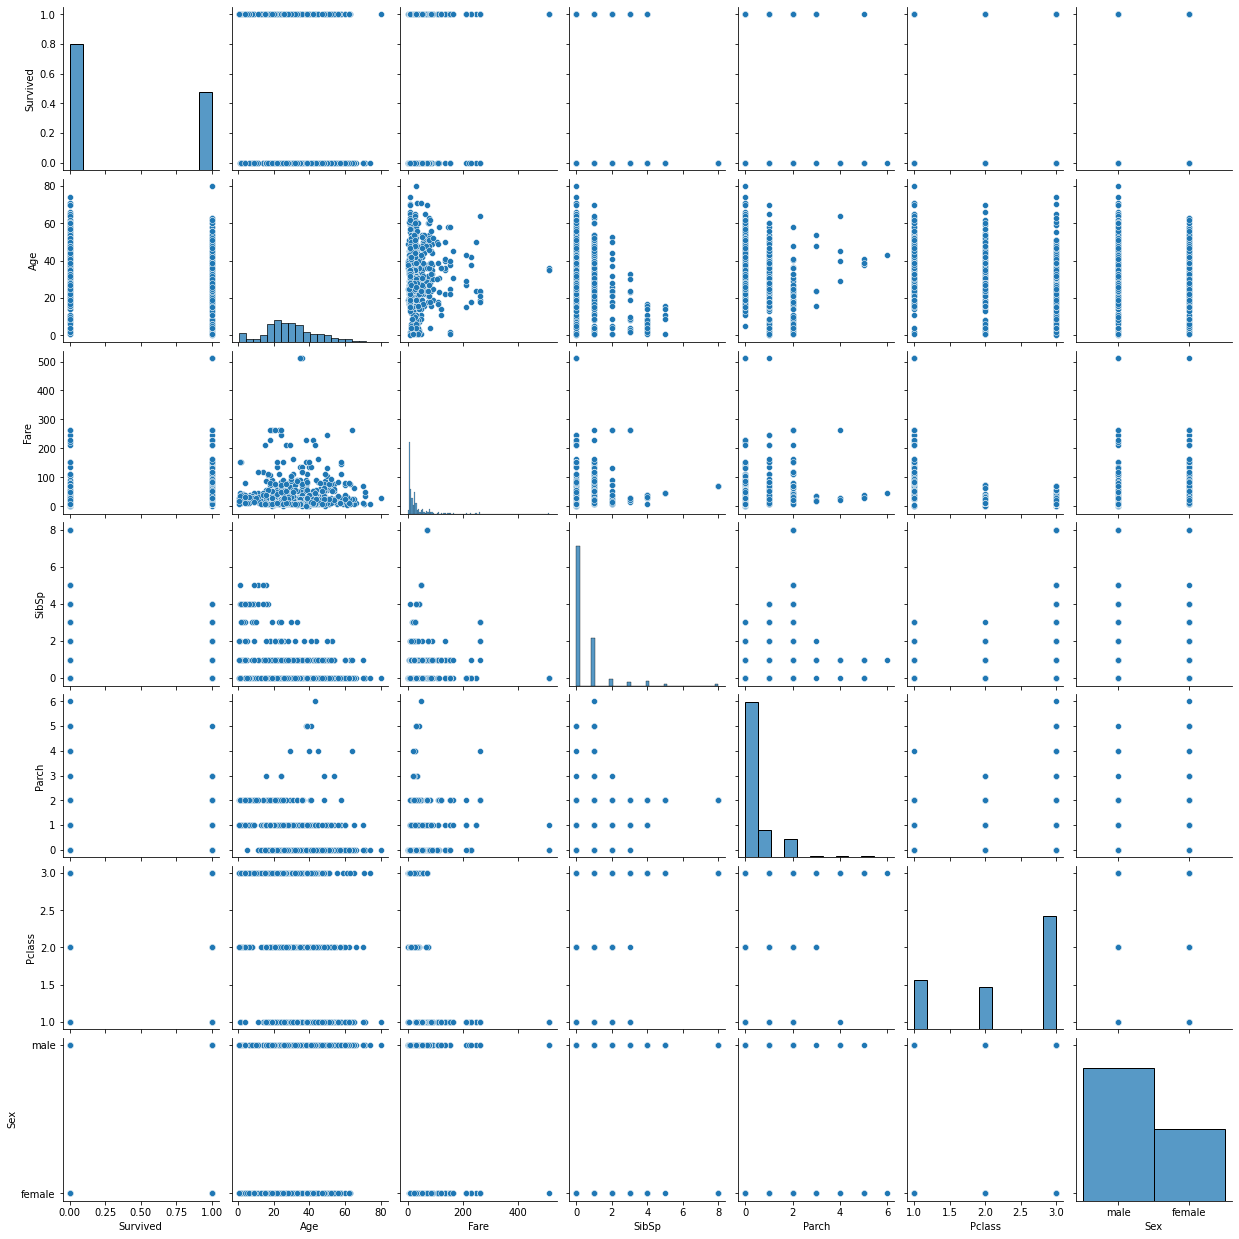

Done!


In [5]:
sns.pairplot(eda_data, vars=['Survived', 'Age', 'Fare', 'SibSp','Parch', 'Pclass', 'Sex'], dropna=True)
plt.show()
print('Done!')

In [48]:
prepare_df(eda_data).columns

['Mr' 'Mrs' 'Miss' 'Master' 'Dr' 'Ms']


Index(['PassengerId', 'Survived', 'Age', 'Ticket', 'Fare', 'Has_cabin',
       'Family', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Embarked_nan',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'SibSp_0.0', 'SibSp_1.0', 'SibSp_2.0', 'SibSp_3.0', 'SibSp_4.0',
       'Parch_0.0', 'Parch_1.0', 'Parch_2.0', 'Title_Dr', 'Title_Master',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Ms'],
      dtype='object')

In [4]:
test_data = pd.read_csv('../data/kaggle/input/titanic/test.csv')
print(test_data.columns)
test_data.describe()

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [50]:
def plot_rate(df: pd.DataFrame, feature):
    m_df = pd.DataFrame(data = df)
    m_df['cnt'] = 1
    m_gb = m_df.groupby(feature).sum()
    m_gb['rate'] = m_gb['Survived']/m_gb['cnt']
    # m_gb[['rate']].plot()
    # plt.bar(m_gb['rate'], m_gb[['rate']])
    # plt.show()
    print(m_gb[['rate']])
    print(m_gb['rate'].keys())

In [53]:
all_data = pd.concat([train_data, test_data], axis=0)
extract_title_from_name(all_data)
extract_title_from_name(train_data)
print(f"Columns: {all_data.columns}")

eda_features = ["Pclass", "Title", "Sex", "SibSp", "Parch", "Embarked"]
# for k in eda_features:
#     plot_rate(train_data, k)
    # print(f"Unique {k}: {train_data[k].unique()}")

['Mr' 'Mrs' 'Miss' 'Master' 'Dr' 'Ms']
['Mr' 'Mrs' 'Miss' 'Master' 'Dr' 'Ms']
Columns: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title', 'cnt'],
      dtype='object')


TypeError: can't multiply sequence by non-int of type 'float'

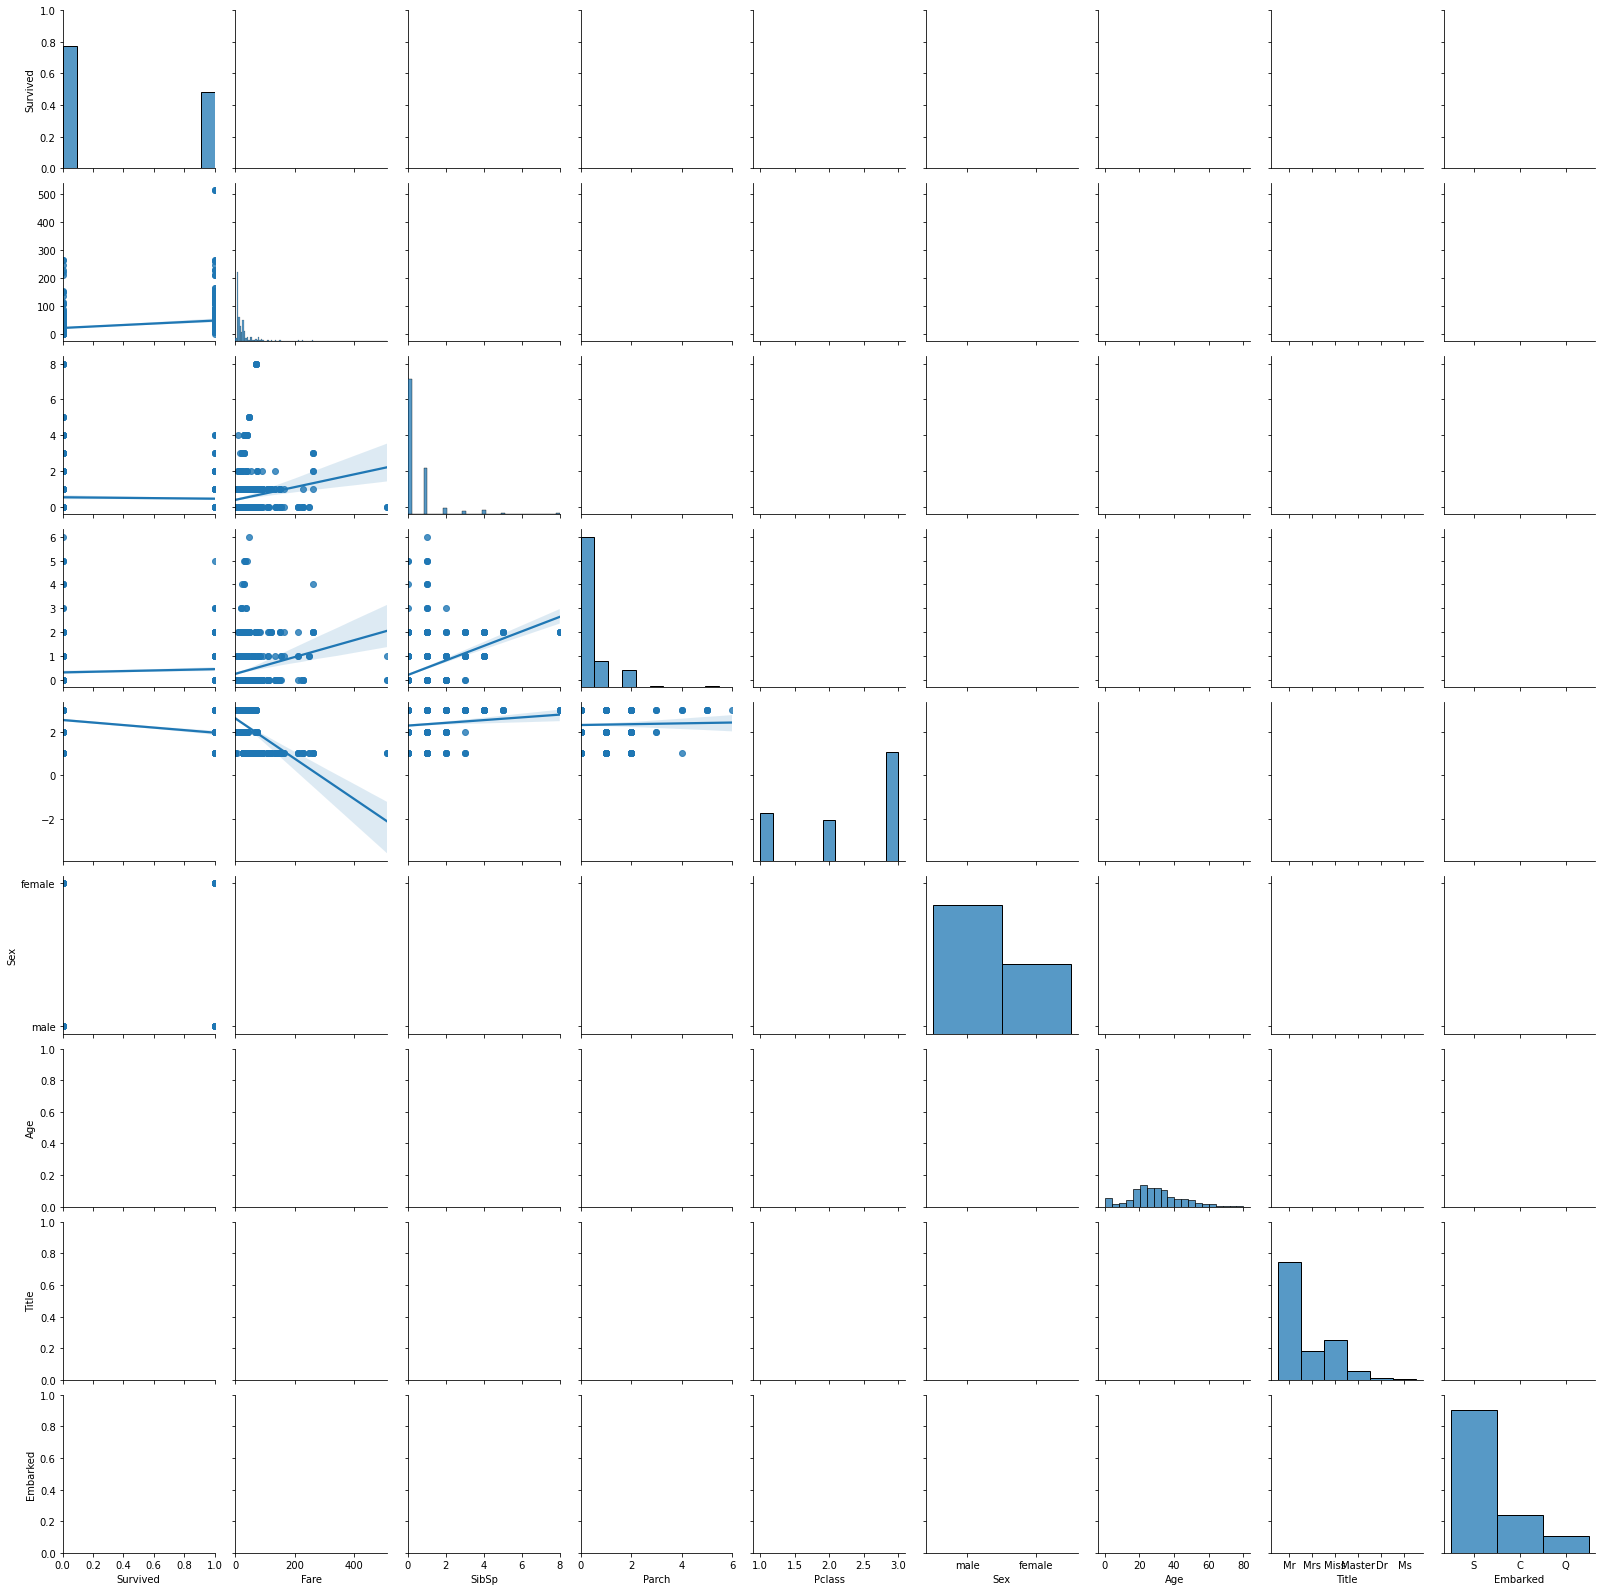

In [78]:
sns.pairplot(eda_data, vars=['Survived', 'Fare', 'SibSp','Parch', 'Pclass', 'Sex', 'Age', 'Title', 'Embarked'],
             # y_vars=['Fare', 'SibSp','Parch', 'Pclass', 'Sex', 'Title', 'Embarked'],
             dropna=True, kind='reg')
plt.show()

In [ ]:
sns.pairplot(eda_data, vars=['Survived', 'Fare', 'SibSp','Parch', 'Pclass', 'Sex', 'Age', 'Title', 'Embarked'],
             # y_vars=['Fare', 'SibSp','Parch', 'Pclass', 'Sex', 'Title', 'Embarked'],
             dropna=True, kind='hist')
plt.show()

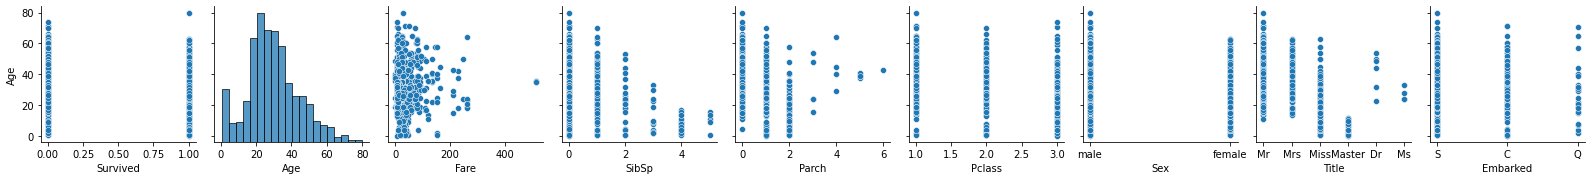

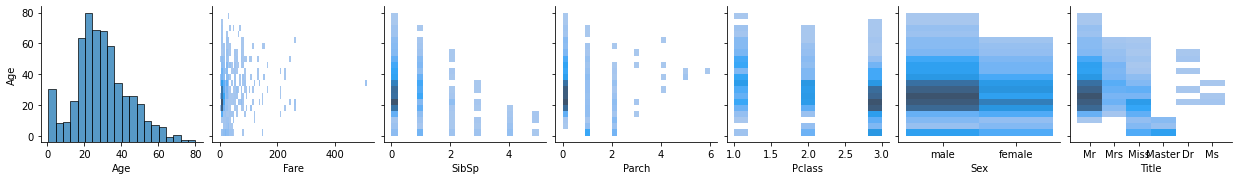

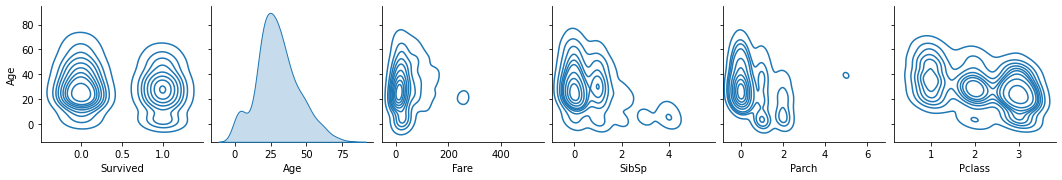

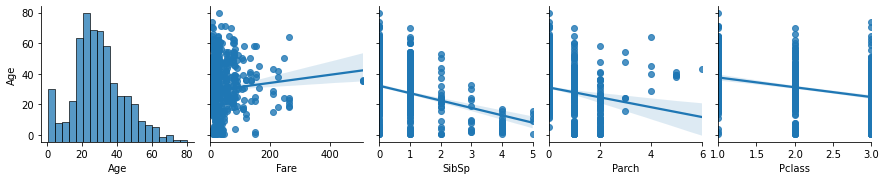

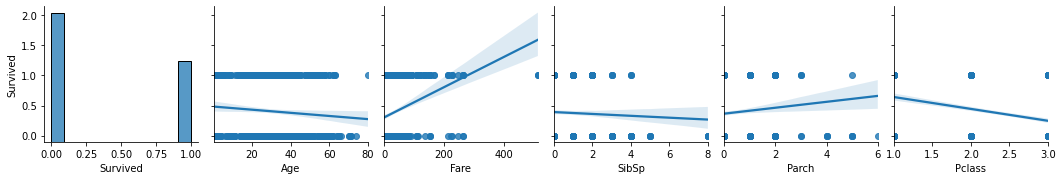

In [77]:
sns.pairplot(eda_data, x_vars=['Survived', 'Age', 'Fare', 'SibSp','Parch', 'Pclass', 'Sex', 'Title', 'Embarked'],
             y_vars=['Age'], dropna=False)
plt.show()
sns.pairplot(eda_data, x_vars=['Age', 'Fare', 'SibSp','Parch', 'Pclass', 'Sex', 'Title'],
             y_vars=['Age'], dropna=False, kind='hist')
plt.show()
sns.pairplot(eda_data, x_vars=['Survived', 'Age', 'Fare', 'SibSp','Parch', 'Pclass'],
             y_vars=['Age'], dropna=False, kind='kde')
plt.show()
sns.pairplot(eda_data, x_vars=['Age', 'Fare', 'SibSp','Parch', 'Pclass'],
             y_vars=['Age'], dropna=True, kind='reg')
plt.show()

sns.pairplot(eda_data, x_vars=['Survived', 'Age', 'Fare', 'SibSp','Parch', 'Pclass'],
             y_vars=['Survived'], dropna=False, kind='reg')
plt.show()

           Survived    Pclass       Age     SibSp     Parch      Fare  \
Survived   1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307   
Pclass    -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500   
Age       -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067   
SibSp     -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651   
Parch      0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225   
Fare       0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000   
Has_cabin -0.316912  0.725541 -0.249732  0.040460 -0.036987 -0.482075   
Family     0.016639  0.065997 -0.301914  0.890712  0.783111  0.217138   

           Has_cabin    Family  
Survived   -0.316912  0.016639  
Pclass      0.725541  0.065997  
Age        -0.249732 -0.301914  
SibSp       0.040460  0.890712  
Parch      -0.036987  0.783111  
Fare       -0.482075  0.217138  
Has_cabin   1.000000  0.009175  
Family      0.009175  1.000000  


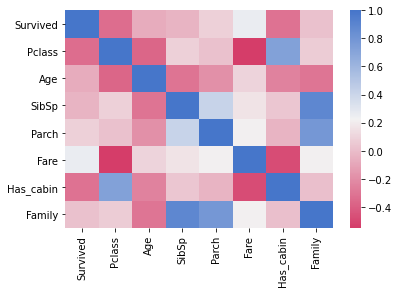

In [82]:
eda_data.drop(columns=['PassengerId'])
print(eda_data.drop(columns=['PassengerId']).corr())
cmap = sns.diverging_palette(0, 255, as_cmap=True)
sns.heatmap(eda_data.drop(columns=['PassengerId']).corr(), cmap=cmap)
plt.show()

In [78]:
# from ml_eda_utils import get_missing_rate
# get_missing_rate(all_data, True)

,missing_sum,missing_rate
Survived,418,31.93%
Age,263,20.09%
Fare,1,0.08%
Cabin,1014,77.46%
Embarked,2,0.15%
cnt,418,31.93%


In [6]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

def eval_msu(x_train, x_eval, y_train, y_eval, _model):
    _model.fit(x_train, train_y)
    eval_predictions = _model.predict(x_eval)
    msu = mean_squared_error(y_eval, eval_predictions)
    train_predictions = _model.predict(x_train)
    train_msu = mean_squared_error(y_train, train_predictions)
    return msu, train_msu

def print_msu(x_train, x_eval, y_train, y_eval, _model):
    msu, train_msu = eval_msu(x_train, x_eval, y_train, y_eval, _model)
    print(f"e_msu={msu:.7f}; t_msu={train_msu:.7f}; model={_model}")

def print_cvs(_model, x_eval, y_eval):
    print(f"µ_cvs={cross_val_score(_model, x_eval, y_eval, cv=5).mean():.7f}; model={_model}")

In [78]:
from sklearn.ensemble import RandomForestClassifier

def forest_accuracy_estimators(_x, _y, x_train, x_eval, y_train, y_eval, max_depth, max_est=600, est_step=5):
    min_msu = float('inf')
    min_train_msu = 0
    optimal_n=0
    estimators = range(50, max_est, est_step)
    _msus = []
    _cvs = []
    for _e in estimators:
        _model = RandomForestClassifier(n_estimators=_e, max_depth=max_depth, random_state=1)
        msu, train_msu = eval_msu(x_train, x_eval, y_train, y_eval, _model)
        _cvs.append(cross_val_score(_model, _x, _y, cv=5).mean())
        _msus.append(msu)
        if msu < min_msu:
            min_msu = msu
            optimal_n = _e
            min_train_msu = train_msu
    df = {"estimators": estimators, "msus": _msus}
    plt.plot(df['estimators'], df['msus'], label=f"d_{max_depth}")
    print(f"min_msu={min_msu:.5f} for depth={max_depth}, n_est={optimal_n}")
    print(f"train_m={min_train_msu:.5f}; CVS={np.max(_cvs):.5f}")

In [3]:
from sklearn.model_selection import train_test_split
train_data = pd.read_csv('../data/kaggle/input/titanic/train.csv')
features = ["Pclass", "Sex", "SibSp", "Parch", "Name", "Embarked", "Cabin", "Age"]
y = train_data["Survived"]
X = prepare_df(train_data[features])
# print(X.describe())
print(X.head())
print(X.columns)
train_x, eval_x, train_y, eval_y = train_test_split(X.fillna(X.mean()), y, random_state=24)

['Mr' 'Mrs' 'Miss' 'Master' 'Dr' 'Ms']
    Age  Has_cabin  Family  Embarked_C  Embarked_Q  Embarked_S  Embarked_nan  \
0  22.0          1       1           0           0           1             0   
1  38.0          0       1           1           0           0             0   
2  26.0          1       0           0           0           1             0   
3  35.0          0       1           0           0           1             0   
4  35.0          1       0           0           0           1             0   

   Pclass_1  Pclass_2  Pclass_3  ...  SibSp_4.0  Parch_0.0  Parch_1.0  \
0         0         0         1  ...          0          1          0   
1         1         0         0  ...          0          1          0   
2         0         0         1  ...          0          1          0   
3         1         0         0  ...          0          1          0   
4         0         0         1  ...          0          1          0   

   Parch_2.0  Title_Dr  Title_Master  Tit

In [4]:
import algorithms
model = algorithms.LogisticRegression()
model.train(train_x, train_y, eval_x, eval_y)

np.shape(a)=(1, 668)
np.shape(y)=(668,)
np.shape(y_pred)=(1, 668)
np.shape(y_true)=(668,)


ValueError: Length of passed values is 1, index implies 668.

In [80]:
model = RandomForestClassifier(n_estimators=40, max_depth=6, random_state=10)
print_cvs(model, X.fillna(X.mean()), y)

def plot_random_forest_by_depth_and_est():
    for d in range(4, 15):
        forest_accuracy_estimators(X.fillna(X.mean()), y, train_x, eval_x, train_y, eval_y, d, max_est=400, est_step=10)
    plt.legend()
    plt.show()
# plot_random_forest_by_depth_and_est()

µ_cvs=0.8114557; model=RandomForestClassifier(max_depth=6, n_estimators=40, random_state=10)


In [81]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=0, max_iter=100)
model.fit(train_x, train_y)
print_msu(train_x, eval_x, train_y, eval_y, model)
print_cvs(model, X.fillna(X.mean()), y)

e_msu=0.1704036; t_msu=0.1676647; model=LogisticRegression(random_state=0)
µ_cvs=0.8316427; model=LogisticRegression(random_state=0)


/usr/local/anaconda3/envs/scientificProject/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/anaconda3/envs/scientificProject/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

e_msu=0.2152466; t_msu=0.2574850; model=SGDClassifier(alpha=0.003, max_iter=10000, random_state=0)
µ_cvs=0.8125604; model=SGDClassifier(alpha=0.003, max_iter=100000, random_state=0)


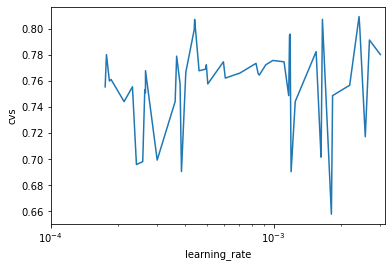

In [82]:
from sklearn.linear_model import SGDClassifier

print_msu(train_x, eval_x, train_y, eval_y, SGDClassifier(random_state=0, max_iter=10000, alpha=0.003))
print_cvs(SGDClassifier(random_state=0, max_iter=100000, alpha=0.003), X.fillna(X.mean()), y)

def plot_sgd_by_lr():
    graph = {}
    for i in range(50):
        exp = -1.3 * np.random.rand() - 2.5
        alpha = 10 ** exp
        cvs = cross_val_score(SGDClassifier(random_state=0, max_iter=100000, alpha=alpha), X.fillna(X.mean()), y,
                              cv=5).mean()
        graph[alpha] = cvs
    lists = sorted(graph.items(), reverse=True)  # sorted by key, return a list of tuples
    _x, _y = zip(*lists)
    plt.plot(_x, _y)
    plt.xscale('log')
    plt.xlabel('learning_rate')
    plt.ylabel('cvs')
    plt.xlim(10 ** -4, 10 ** -2.5)
    plt.show()
plot_sgd_by_lr()

In [83]:
# from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB

# print_cvs(GaussianNB(), X.fillna(X.mean()), y)
print_cvs(MultinomialNB(), X.fillna(X.mean()), y)
print_cvs(ComplementNB(), X.fillna(X.mean()), y)

µ_cvs=0.8013245; model=MultinomialNB()
µ_cvs=0.7990961; model=ComplementNB()


In [84]:
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import BernoulliRBM

print_cvs(KNeighborsClassifier(), X.fillna(X.mean()), y)
# print_cvs(KNeighborsRegressor(), X.fillna(X.mean()), y)
# print_cvs(MLPRegressor(max_iter=100000, hidden_layer_sizes=(400,)), X.fillna(X.mean()), y)
print_cvs(MLPClassifier(max_iter=1000000, hidden_layer_sizes=(100,),
                        learning_rate="constant", learning_rate_init=0.000228), X.fillna(X.mean()), y)

µ_cvs=0.7980227; model=KNeighborsClassifier()
µ_cvs=0.8204507; model=MLPClassifier(learning_rate_init=0.000228, max_iter=1000000)


In [85]:
def plot_sgd_by_lr2():
    graph_lr = {}
    graph_a = {}
    for i in range(50):
        exp = -1.1 * np.random.rand() - 2.9
        lr = 10 ** exp
        exp2 = -2.5 * np.random.rand() - 1.5
        alpha = 10 ** exp2
        cvs = cross_val_score(MLPClassifier(max_iter=100000, hidden_layer_sizes=(100,),
                        learning_rate="constant", learning_rate_init=lr), X.fillna(X.mean()), y,
                              cv=5).mean()
        graph_a[alpha] = cvs
        graph_lr[lr] = cvs
    lists = sorted(graph_lr.items(), reverse=True)  # sorted by key, return a list of tuples
    _x, _y = zip(*lists)
    plt.plot(_x, _y)
    plt.xscale('log')
    plt.xlabel('learning_rate')
    plt.ylabel('cvs')
    # plt.xlim(10 ** -4, 10 ** -2.5)
    plt.show()
    lists_a = sorted(graph_a.items(), reverse=True)  # sorted by key, return a list of tuples
    _x_a, _y_a = zip(*lists_a)
    plt.plot(_x_a, _y_a)
    plt.xscale('log')
    plt.xlabel('alpha')
    plt.ylabel('cvs')
    # plt.xlim(10 ** -4, 10 ** -2.5)
    plt.show()
    # print(f"max={pd.DataFrame(sorted(graph_lr.values(), reverse=True)).head()}")
    print(f"max_lr={pd.DataFrame(lists).sort_values(1).tail()}")
    print(f"max_al={pd.DataFrame(lists_a).sort_values(1).tail()}")
# plot_sgd_by_lr2()

In [90]:
from sklearn.svm import SVR

print_cvs(SVR(), X.fillna(X.mean()), y)

µ_cvs=0.3737242; model=SVR()
µ_cvs=0.3221770; model=SVR(kernel='linear')
µ_cvs=-911.4164744; model=SVR(kernel='sigmoid')
µ_cvs=0.3664126; model=SVR(epsilon=0.2)
µ_cvs=0.1362166; model=SVR(kernel='poly')
µ_cvs=-0.1557265; model=SVR(degree=5, kernel='poly')


In [87]:
from sklearn.ensemble import RandomForestClassifier

test_data = pd.read_csv('../data/kaggle/input/titanic/test.csv')
X_test = prepare_df(test_data[features])
X_test = X_test.fillna(X.mean())

model = LogisticRegression()
model.fit(train_x, train_y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('../data/kaggle/output/my_submission.csv', index=False)
print(model)
print("Your submission was successfully saved!")

['Mr' 'Mrs' 'Miss' 'Master' 'Ms' 'Dr']
LogisticRegression()
Your submission was successfully saved!


/usr/local/anaconda3/envs/scientificProject/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


['Mr' 'Mrs' 'Miss' 'Master' 'Dr' 'Ms']


<AxesSubplot:>

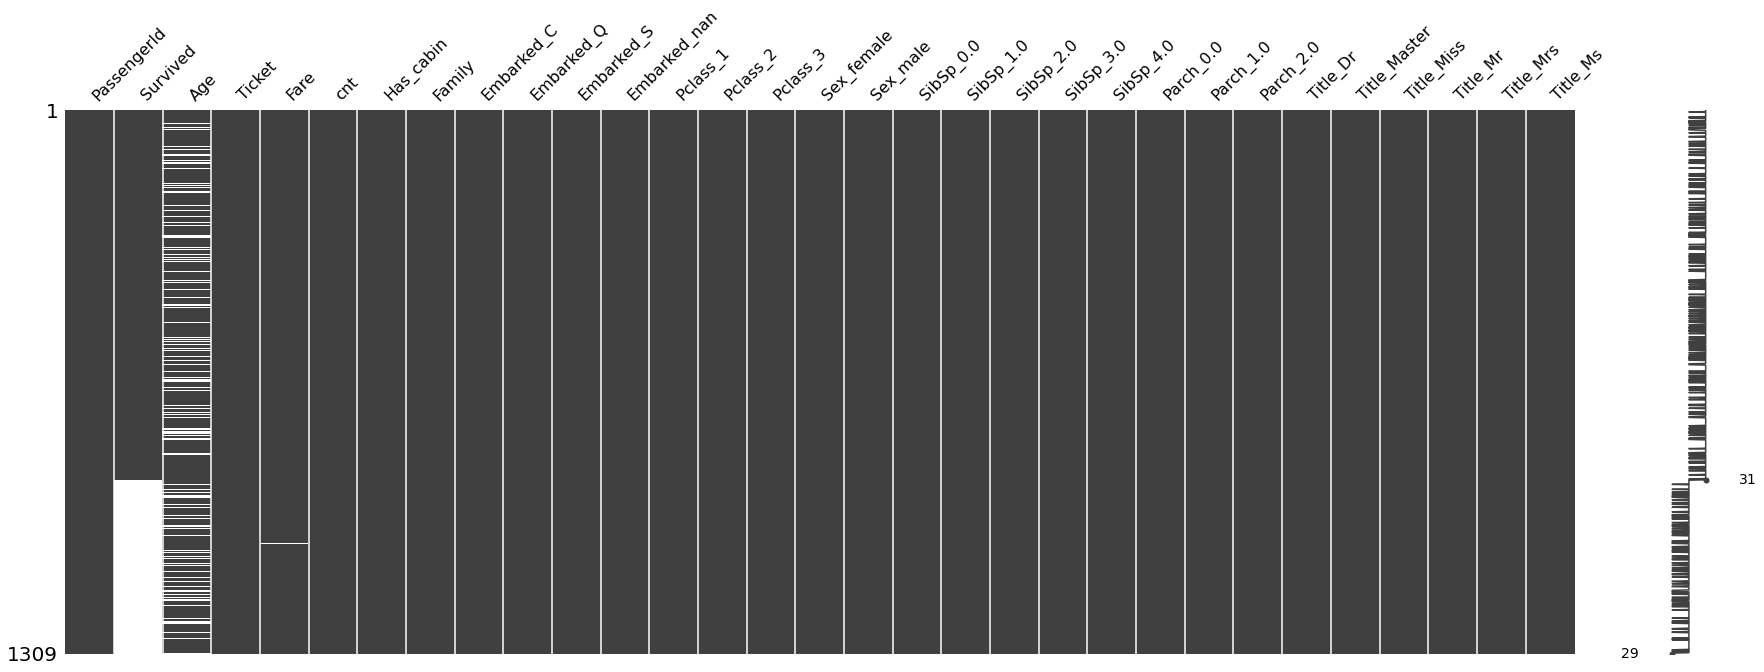

In [88]:
import pandas as pd
import missingno as msno

train_data = pd.read_csv('../data/kaggle/input/titanic/train.csv')
%matplotlib inline
msno.matrix(prepare_df(all_data), figsize = (30,10))